<a href="https://colab.research.google.com/github/JeffyWongo/House-Price-Predictor/blob/main/HousePriceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Data

In [ ]:

#install.packages(c("dplyr", "ggplot2", "randomForest", "MASS", "caret", "iml"))


In [ ]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
data <- read.csv('housing.csv')

In [ ]:
str(data)

'data.frame':	20640 obs. of  10 variables:
 $ longitude         : num  -122 -122 -122 -122 -122 ...
 $ latitude          : num  37.9 37.9 37.9 37.9 37.9 ...
 $ housing_median_age: num  41 21 52 52 52 52 52 52 42 52 ...
 $ total_rooms       : num  880 7099 1467 1274 1627 ...
 $ total_bedrooms    : num  129 1106 190 235 280 ...
 $ population        : num  322 2401 496 558 565 ...
 $ households        : num  126 1138 177 219 259 ...
 $ median_income     : num  8.33 8.3 7.26 5.64 3.85 ...
 $ median_house_value: num  452600 358500 352100 341300 342200 ...
 $ ocean_proximity   : chr  "NEAR BAY" "NEAR BAY" "NEAR BAY" "NEAR BAY" ...


In [ ]:
head(data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
3,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
4,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
5,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
6,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


# Data Cleaning

In [ ]:
data <- data %>%
  mutate_all(~ifelse(. == "?", NA, .))

missing_values <- colSums(is.na(data))
print(missing_values)

         longitude           latitude housing_median_age        total_rooms 
                 0                  0                  0                  0 
    total_bedrooms         population         households      median_income 
               207                  0                  0                  0 
median_house_value    ocean_proximity 
                 0                  0 


In [ ]:
data <- na.omit(data)
head(data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
3,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
4,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
5,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
6,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


In [ ]:
missing_values <- colSums(is.na(data))
print(missing_values)

         longitude           latitude housing_median_age        total_rooms 
                 0                  0                  0                  0 
    total_bedrooms         population         households      median_income 
                 0                  0                  0                  0 
median_house_value    ocean_proximity 
                 0                  0 


# Exploratory Data Analysis

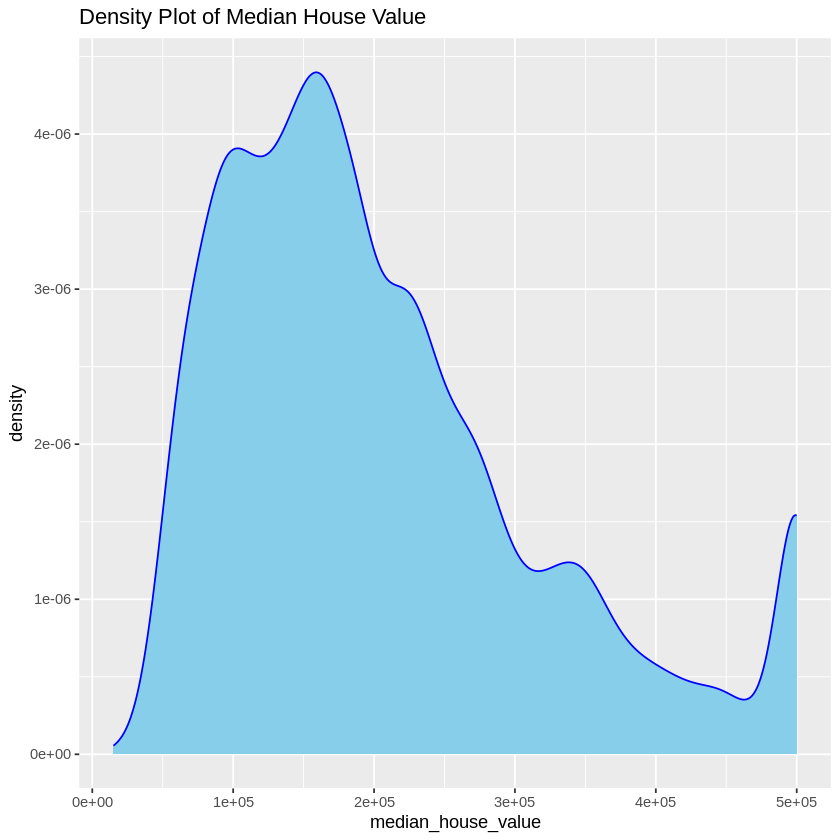

In [ ]:
ggplot(data, aes(x = median_house_value)) +
  geom_density(fill = "skyblue", color = "blue") +
  labs(title = "Density Plot of Median House Value")

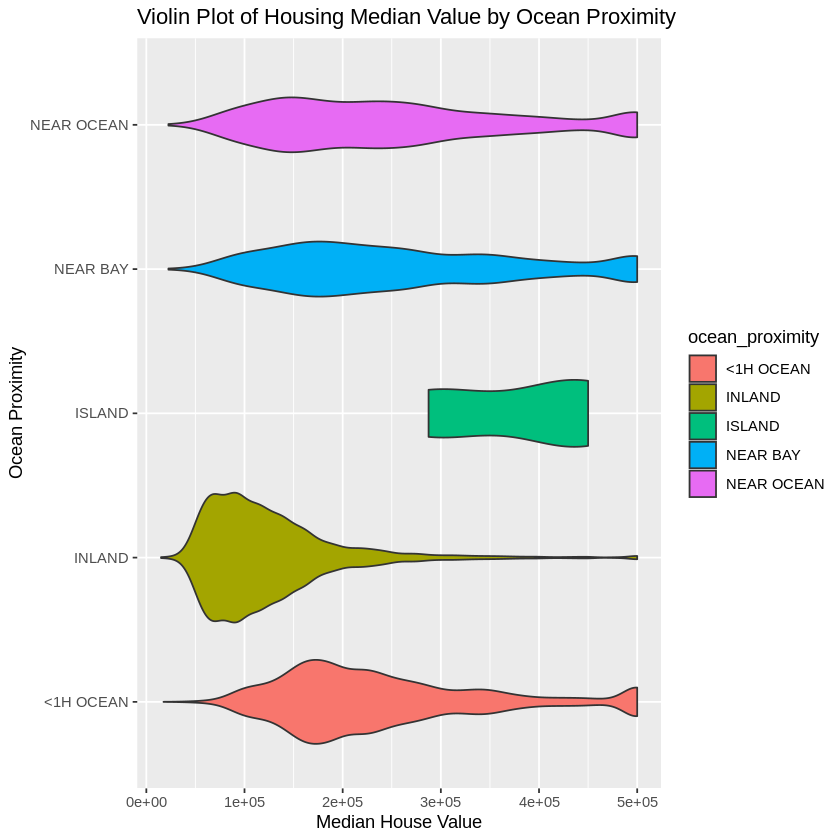

In [ ]:
ggplot(data, aes(x = ocean_proximity, y = median_house_value, fill = ocean_proximity)) +
  geom_violin() +
  coord_flip() +
  labs(title = "Violin Plot of Housing Median Value by Ocean Proximity",
       x = "Ocean Proximity",
       y = "Median House Value")

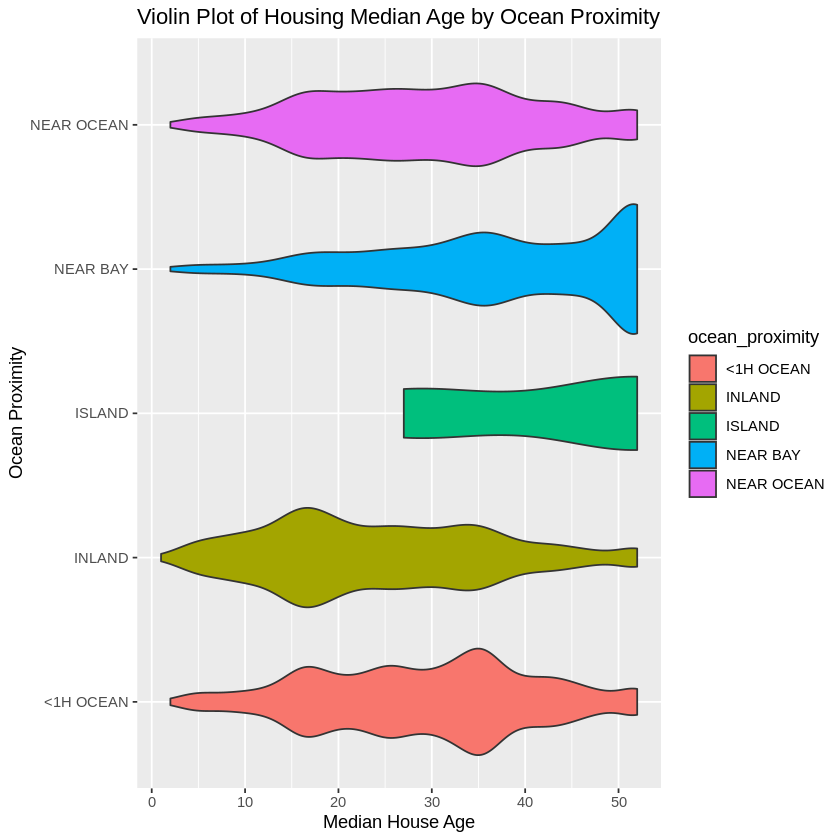

In [ ]:
ggplot(data, aes(x = ocean_proximity, y = housing_median_age, fill = ocean_proximity)) +
  geom_violin() +
  coord_flip() +
  labs(title = "Violin Plot of Housing Median Age by Ocean Proximity",
       x = "Ocean Proximity",
       y = "Median House Age")

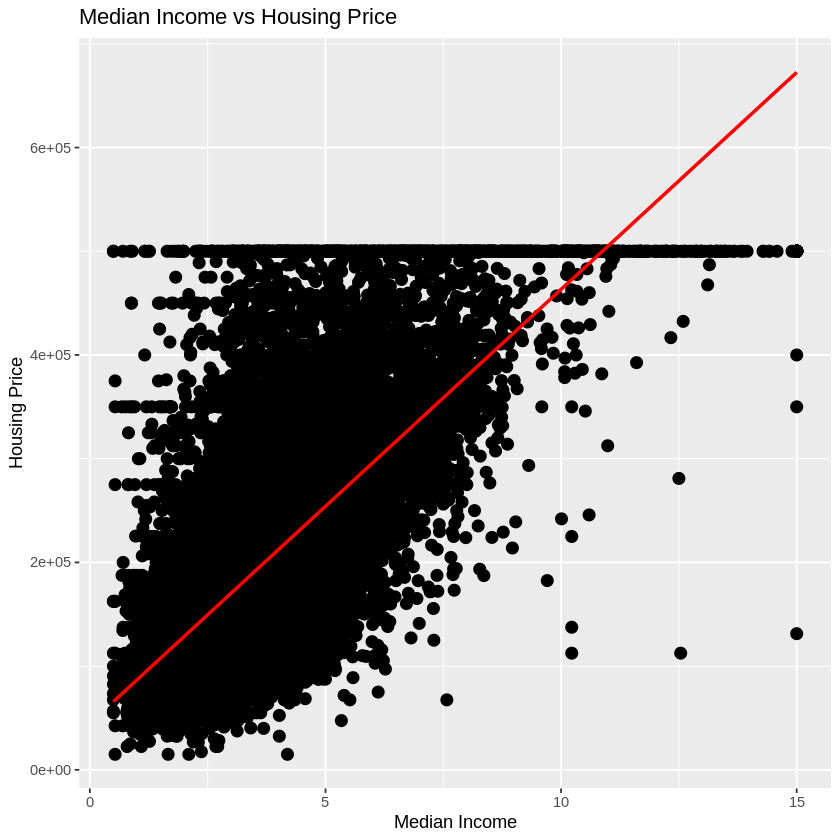

In [ ]:
ggplot(data, aes(x = median_income, y = median_house_value)) +
  geom_point(color = "black", size = 3) + labs(title = "Median Income vs Housing Price",
       x = "Median Income",
       y = "Housing Price")  + geom_smooth(method = "lm", formula = y ~ x, color = "red", se = FALSE)

Warning message:
“Removed 23 rows containing missing values (`position_stack()`).”


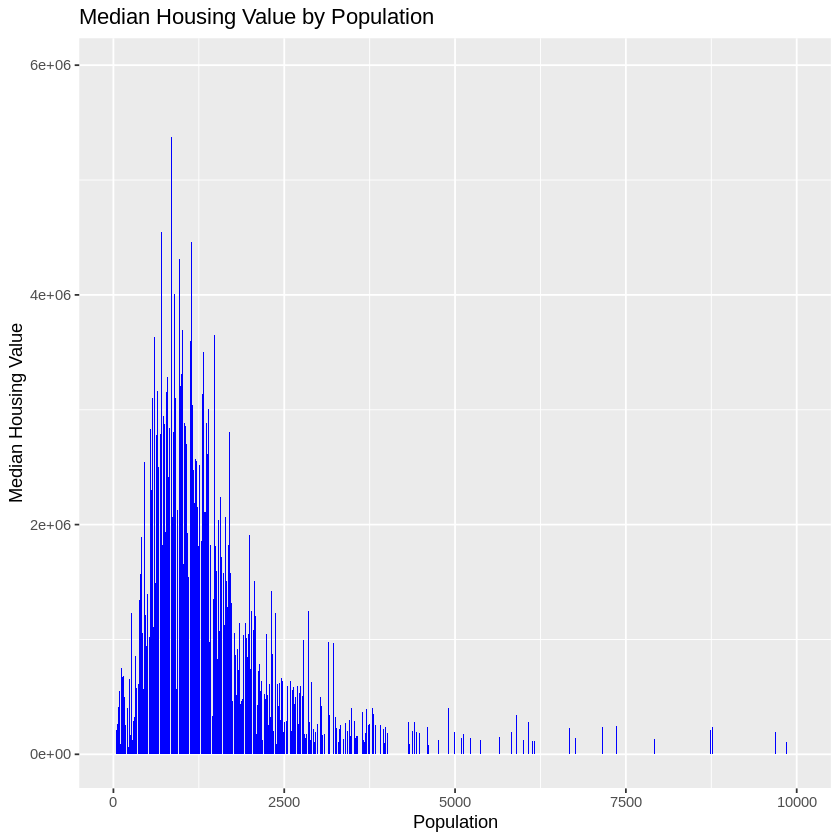

In [ ]:
ggplot(data, aes(x = population, y = median_house_value)) +
  geom_bar(stat = "identity", fill = "blue") + labs(title = "Median Housing Value by Population",
       x = "Population",
       y = "Median Housing Value") + xlim(c(0, 10000))

# Hypothesis


Hypothesis 2

In [ ]:
data <- data %>%
  mutate(population_density = population / households)

#linear regression to test the hypothesis
model <- lm(median_house_value ~ population_density, data = data)

summary(model)


Call:
lm(formula = median_house_value ~ population_density, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-192084  -87340  -27109   57811  303108 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        207667.39     841.58  246.76  < 2e-16 ***
population_density   -261.43      77.35   -3.38 0.000727 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 115400 on 20431 degrees of freedom
Multiple R-squared:  0.0005588,	Adjusted R-squared:  0.0005099 
F-statistic: 11.42 on 1 and 20431 DF,  p-value: 0.0007265


In [ ]:

dataTrain <- read.csv('housing.csv')
dataTest <- read.csv('housing.csv')

dataTrain <- dataTrain %>% mutate(across(everything(), ~ifelse(is.na(.), median(., na.rm = TRUE), .)))
dataTest <- dataTest %>% mutate(across(everything(), ~ifelse(is.na(.), median(., na.rm = TRUE), .)))

dataTrain$ocean_proximity <- as.factor(dataTrain$ocean_proximity)
dataTest$ocean_proximity <- as.factor(dataTest$ocean_proximity)

model <- lm(median_house_value ~ longitude + latitude + housing_median_age + total_rooms +
            total_bedrooms + population + households + median_income + ocean_proximity, data = dataTrain)
summary(model)

predictions <- predict(model, newdata = dataTest)

actual_values <- dataTest$median_house_value


Call:
lm(formula = median_house_value ~ longitude + latitude + housing_median_age + 
    total_rooms + total_bedrooms + population + households + 
    median_income + ocean_proximity, data = dataTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-550613  -42739  -10602   28750  794919 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -2.233e+06  8.748e+04 -25.527  < 2e-16 ***
longitude                 -2.643e+04  1.014e+03 -26.068  < 2e-16 ***
latitude                  -2.517e+04  9.998e+02 -25.178  < 2e-16 ***
housing_median_age         1.058e+03  4.371e+01  24.203  < 2e-16 ***
total_rooms               -4.731e+00  7.706e-01  -6.139 8.48e-10 ***
total_bedrooms             7.134e+01  5.932e+00  12.027  < 2e-16 ***
population                -3.929e+01  1.064e+00 -36.928  < 2e-16 ***
households                 7.780e+01  6.659e+00  11.685  < 2e-16 ***
median_income              3.876e+04  3.322e+02 116.670  < 2e-16 **

In [ ]:
install.packages("leaps")

library(leaps)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
formula <- median_house_value ~ longitude + latitude + housing_median_age + total_rooms +
            total_bedrooms + population + households + median_income + ocean_proximity

# Best subsets regression
best_subsets <- regsubsets(formula, data = dataTrain, nvmax = 10, method = "exhaustive")

best_subsets_summary <- summary(best_subsets)
print(best_subsets_summary)

best_model_index <- which.max(best_subsets_summary$adjr2)
best_model <- best_subsets_summary$which[best_model_index, ]
print(best_model)


Subset selection object
Call: regsubsets.formula(formula, data = dataTrain, nvmax = 10, method = "exhaustive")
12 Variables  (and intercept)
                          Forced in Forced out
longitude                     FALSE      FALSE
latitude                      FALSE      FALSE
housing_median_age            FALSE      FALSE
total_rooms                   FALSE      FALSE
total_bedrooms                FALSE      FALSE
population                    FALSE      FALSE
households                    FALSE      FALSE
median_income                 FALSE      FALSE
ocean_proximityINLAND         FALSE      FALSE
ocean_proximityISLAND         FALSE      FALSE
ocean_proximityNEAR BAY       FALSE      FALSE
ocean_proximityNEAR OCEAN     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          longitude latitude housing_median_age total_rooms total_bedrooms
1  ( 1 )  " "       " "      " "                " "         " "           
2  ( 1 )  " "       " "      " "  

In [ ]:
best_model_index <- which.max(best_subsets_summary$adjr2)
best_model <- best_subsets_summary$which[best_model_index, ]
print(best_model)


              (Intercept)                 longitude                  latitude 
                     TRUE                      TRUE                      TRUE 
       housing_median_age               total_rooms            total_bedrooms 
                     TRUE                      TRUE                      TRUE 
               population                households             median_income 
                     TRUE                      TRUE                      TRUE 
    ocean_proximityINLAND     ocean_proximityISLAND   ocean_proximityNEAR BAY 
                     TRUE                      TRUE                     FALSE 
ocean_proximityNEAR OCEAN 
                    FALSE 


ERROR: Error in eval(predvars, data, env): object 'Intercept' not found


In [ ]:

predictions <- predict(selected_model, newdata = dataTest)

actual_values <- dataTest$median_house_value

rmse <- sqrt(mean((predictions - actual_values)^2))
cat("RMSE: ", rmse, "\n")

rss <- sum((predictions - actual_values)^2)
tss <- sum((actual_values - mean(actual_values))^2)
rsquared <- 1 - rss/tss
cat("R-squared: ", rsquared, "\n")


ERROR: Error in eval(expr, envir, enclos): object 'selected_model' not found


In [ ]:
age_model <- lm(housing_median_age ~ population + median_income, data = data)

# Summary of the linear regression model
summary(age_model)

# Plot the relationships
ggplot(data, aes(x = population, y = housing_median_age)) +
  geom_point() +
  geom_smooth(method = "lm", col = "red") +
  labs(title = "Relationship between Population and Housing Median Age",
       x = "Population",
       y = "Housing Median Age")

ggplot(data, aes(x = median_income, y = housing_median_age)) +
  geom_point() +
  geom_smooth(method = "lm", col = "red") +
  labs(title = "Relationship between Median Income and Housing Median Age",
       x = "Median Income",
       y = "Housing Median Age")


Call:
lm(formula = housing_median_age ~ population + median_income, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.020  -9.498   0.508   8.028  96.728 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.630e+01  2.163e-01  167.81   <2e-16 ***
population    -3.280e-03  7.371e-05  -44.50   <2e-16 ***
median_income -7.742e-01  4.398e-02  -17.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.94 on 20430 degrees of freedom
Multiple R-squared:  0.1011,	Adjusted R-squared:  0.101 
F-statistic:  1149 on 2 and 20430 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


In [ ]:
#Billy Section--------------------------------------------------------------------------------------------------
library(tidyverse) # for `ggplot2`, `dplyr`, and more
library(maps) # for map visualization
library(mapproj)
library(geosphere)
states_map <- map_data("state")
dim(states_map)
glimpse(states_map)
california_map <- states_map %>% filter(region == "california")
data <- read.csv("/cloud/project/california_housing_train.csv")
head(data)

ggplot() + #GGplot that maps all of the coordinates listed in our data
  geom_map(data = california_map, map = california_map,
           aes(map_id = region), fill = "white", color = "black") +
  expand_limits(x = california_map$long, y = california_map$lat) +
  coord_quickmap() +
  geom_point(aes(x = data$longitude, y = data$latitude), color = "red")

ggplot() + #GGplot map to show the house value of each coordinates based on color
  geom_map(data = california_map, map = california_map,
           aes(map_id = region), fill = "white", color = "black") +
  expand_limits(x = california_map$long, y = california_map$lat) +
  coord_quickmap() +
  geom_point(data = data, aes(x = longitude, y = latitude, color = median_house_value)) +
  scale_color_gradient(low = "blue", high = "red") +  # Customize the color scale as needed
  theme_minimal() +  # Apply a minimal theme for better appearance
  labs(color = "Median House Value",  # Add a label for the legend
       title = "Median House Value in California",
       x = "Longitude",
       y = "Latitude")

# Making a new column that gives a concrete number for the distance to the ocean coastline-------------------
# Filter for California
california_map <- states_map %>% filter(region == "california")

# Define the coordinates for the California coastline (more accurate)
coastline_coords <- data.frame(
  long = c(-124.25, -124.1, -124, -123.5, -122.75, -122, -121.25, -120.5, -119.25, -118.5, -117.5, -117.2),
  lat = c(42, 41, 40, 38.75, 38, 37, 35.75, 34.5, 34.25, 34, 33.4, 32.75)
)

# Plot the map with the manual coastline coordinates
ggplot() +
  geom_map(data = california_map, map = california_map,
           aes(map_id = region), fill = "white", color = "black") +
  expand_limits(x = california_map$long, y = california_map$lat) +
  coord_quickmap() +
  geom_line(data = coastline_coords, aes(x = long, y = lat), color = "blue", size = 1) +
  geom_point(data = coastline_coords, aes(x = long, y = lat), color = "red", size = 1) +
  labs(title = "Manual Coastal Coordinates",
       x = "Longitude",
       y = "Latitude")

# Function to calculate distance to the coastline
calculate_distance <- function(lat, long, coastline_coords) {
  point <- cbind(long, lat)
  distances <- apply(coastline_coords, 1, function(coast_point) {
    distHaversine(point, coast_point)
  })
  return(min(distances))
}

# Creates a new column with the distance to coastline in meters
data$distance_to_coast <- mapply(calculate_distance, data$latitude, data$longitude, MoreArgs = list(coastline_coords = coastline_coords))

# Creates the linear regression model
model <- lm(median_house_value ~ distance_to_coast, data = data)

summary(model)

# Creates the scatter plot
ggplot(data, aes(x = distance_to_coast, y = median_house_value)) +
  geom_point(alpha = 0.5, color = "blue") +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(
    title = "Median House Value vs. Distance to Coast",
    x = "Distance to Coast",
    y = "Median House Value"
  ) +
  theme_minimal()


In [ ]:
# Testing and Training data to train the linear model with.
# Gather training and testing sets
set.seed(123)

dataTrain <- read.csv("/cloud/project/california_housing_train.csv")
dataTest <- read.csv("/cloud/project/california_housing_test.csv")


# Fit a linear model with all of the columns
model <- lm(median_house_value ~ ., data = dataTrain)
summary(model)


# Calculate model metrics
yhat <- predict(model, dataTest)
y <- dataTest$median_house_value

rss <- sum((y - yhat)^2)
rse <- sqrt(rss/(length(y) - length(yhat)))
tss <- sum((y-mean(y))^2)
rsquared <- 1 - rss/tss

cat("RSS: ", rss, "\n")
cat("TSS: ", tss, "\n")
cat("R-squared: ", rsquared, "\n")


# Plotting predicted vs actual values
ggplot(dataTest, aes(x = median_house_value, y = predictions)) +
  geom_point(color = "blue") +
  geom_abline(intercept = 0, slope = 1, color = "red") +
  labs(title = "Predicted vs Actual Median House Value",
       x = "Actual Median House Value",
       y = "Predicted Median House Value") +
  theme_minimal()

summary(lm(median_house_value ~ median_income, data = data))

# Plots a graph with the highest predictor we found which was medina income of the area.
ggplot(data, aes(x = median_income, y = median_house_value)) +
  geom_point(color = "blue", alpha = 0.5) +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(title = "Median Income and Median House Value",
       x = "Median Income",
       y = "Median House Value") +
  theme_minimal()